In [1]:
import numpy as np
from clean_data import draw_sketch, to_big_strokes

In [2]:
category = "airplane"

drawings = np.load(f"data/{category}.npz", allow_pickle=True, encoding='latin1')
drawings.items

<bound method NpzFile.items of NpzFile 'data/airplane.npz' with keys: test, train, valid>

In [3]:
drawings["test"][0].shape

(55, 3)

In [4]:
drawings["test"][0]

array([[  40,  -10,    0],
       [  52,   -1,    0],
       [  26,    3,    0],
       [  18,    9,    0],
       [  87,   -2,    0],
       [  60,    5,    0],
       [  24,    8,    0],
       [  14,    0,    0],
       [   7,  -23,    0],
       [  16,   -2,    0],
       [   7,    2,    0],
       [   6,   16,    0],
       [  -7,   38,    0],
       [ -12,    6,    0],
       [  -5,   -2,    0],
       [  -9,  -12,    0],
       [ -13,   -4,    0],
       [ -35,   -1,    0],
       [ -50,    9,    0],
       [ -70,   -7,    0],
       [ -60,   -2,    0],
       [ -59,   12,    0],
       [ -18,    0,    0],
       [ -56,  -10,    0],
       [  -6,   -6,    0],
       [  -2,   -5,    0],
       [   8,   -9,    0],
       [  36,   -9,    1],
       [ 101,  -11,    0],
       [  -1,  -21,    0],
       [   5,  -17,    0],
       [  33,  -68,    0],
       [  10,  -17,    0],
       [  17,  -16,    0],
       [  11,    4,    0],
       [   9,   19,    0],
       [   4,   23,    0],
 

In [5]:
to_big_strokes(drawings["test"][0])

array([[ 40., -10.,   1.,   0.,   0.],
       [ 52.,  -1.,   1.,   0.,   0.],
       [ 26.,   3.,   1.,   0.,   0.],
       ...,
       [  0.,   0.,   0.,   0.,   1.],
       [  0.,   0.,   0.,   0.,   1.],
       [  0.,   0.,   0.,   0.,   1.]])

In [6]:
def process_drawings(drawings):
    for drawing in drawings:
        yield to_big_strokes(drawing)

output = {
    data_section: np.asarray(
        list(process_drawings(drawings[data_section])), dtype=np.int16
    )
    for data_section in ["train", "test", "valid"]
}

In [7]:
[len(data) for data in output.values()]

[70000, 2500, 2500]

In [9]:
output["train"][0].shape

(20000, 5)

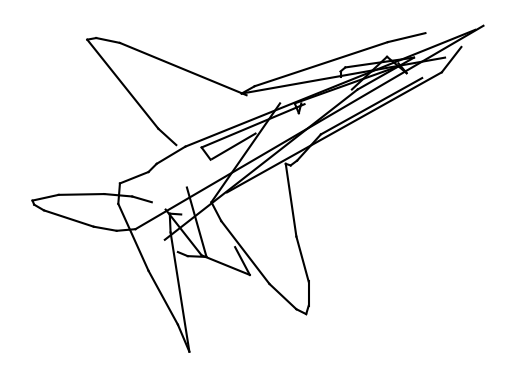

In [8]:
draw_sketch(output["train"][10])

In [9]:
with open(f"data/processed_{category}.npz", "wb") as output_file:
    np.savez_compressed(output_file, **output)